In [ ]:
NAMA  : NASWA DINA AMALIA
KELAS : ALPHA (PAGI)

In [99]:
# Import pustaka dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
#Library Algoritma LR,RF,SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [103]:
df = pd.read_csv ('heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [105]:
df['target'] = df.target

In [107]:
# Lihat informasi umum
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [109]:
# Hitung statistik deskriptif
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [111]:
# Distribusi target (benign vs malignant)
print(df['target'].value_counts())

target
1    526
0    499
Name: count, dtype: int64


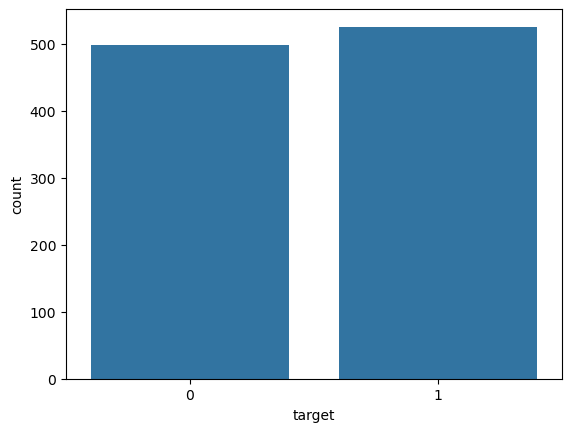

In [113]:
# Visualisasi distribusi diagnosis (benign=0, malignant=1)
sns.countplot(x='target', data=df)
plt.show()

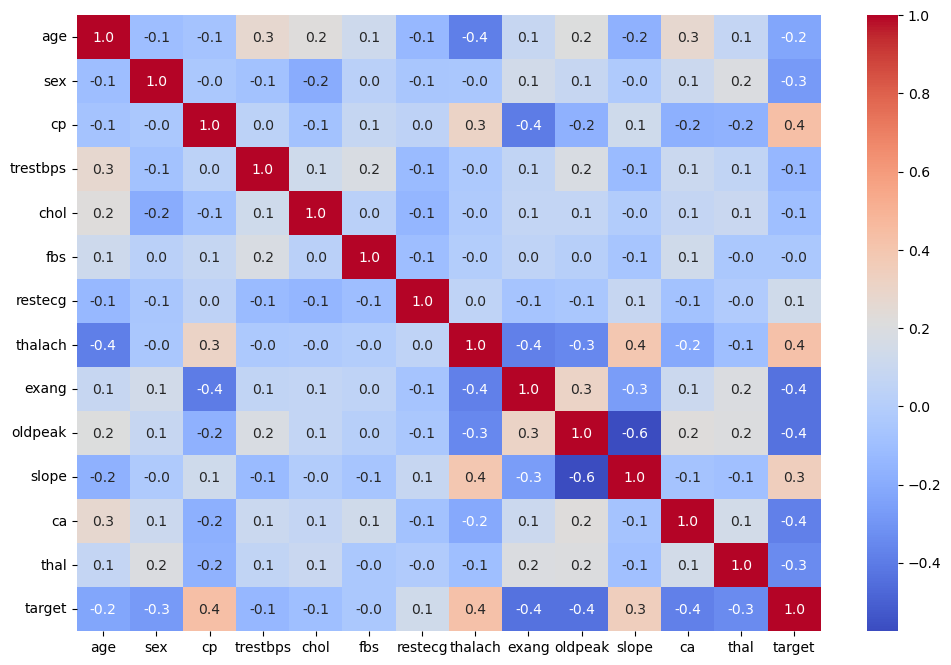

In [115]:
# Korelasi antara fitur
corr_matrix = df.corr()
# Visualisasi korelasi dalam bentuk heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [117]:
# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

In [119]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
# Inisialisasi model
model_lr = LogisticRegression()
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_svm = SVC(kernel='linear', random_state=42)

# Latih model
model_lr.fit(X_train_scaled, y_train)
model_rf.fit(X_train, y_train)  # Random Forest tidak perlu di scaling
model_svm.fit(X_train_scaled, y_train)

# Prediksi pada data uji
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test)
y_pred_svm = model_svm.predict(X_test_scaled)

In [131]:
# Hitung dan tampilkan akurasi
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Akurasi Logistic Regression: {accuracy_lr:.2f}")
print(f"Akurasi Random Forest: {accuracy_rf:.2f}")
print(f"Akurasi SVM: {accuracy_svm:.2f}")

Akurasi Logistic Regression: 0.80
Akurasi Random Forest: 0.99
Akurasi SVM: 0.81


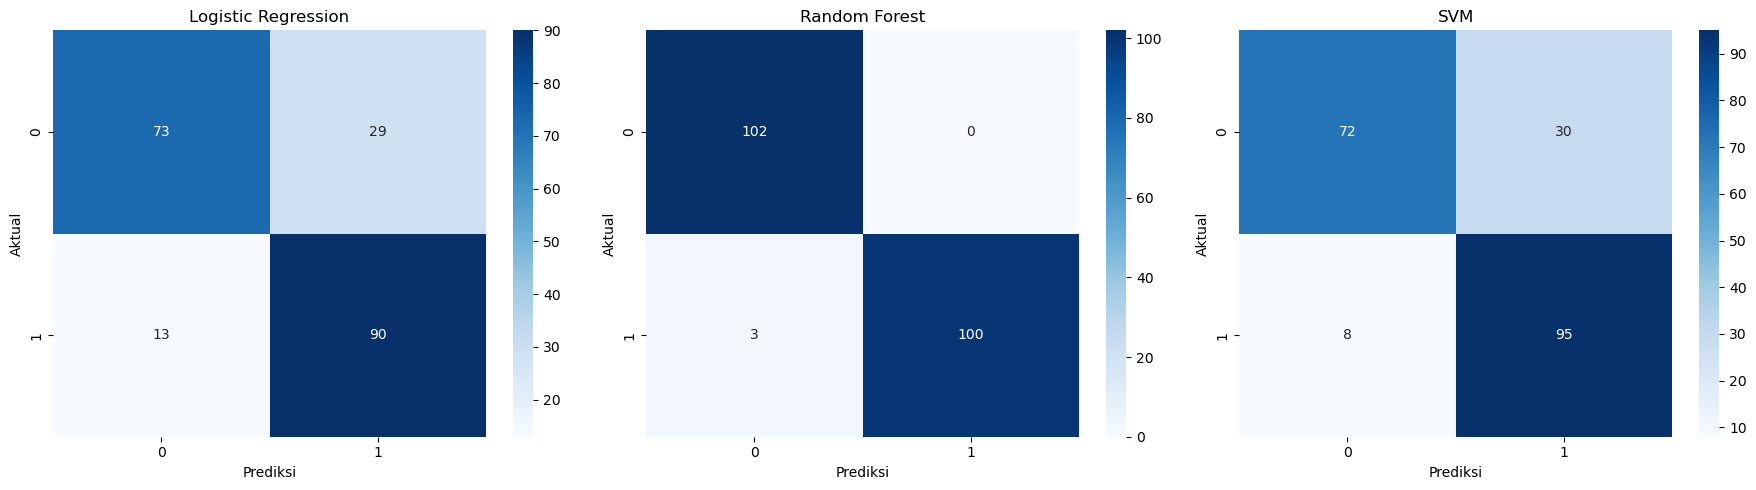

In [133]:
# Buat dan tampilkan confusion matrix
models = ['Logistic Regression', 'Random Forest', 'SVM']
predictions = [y_pred_lr, y_pred_rf, y_pred_svm]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, model in enumerate(models):
    cm = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(model)
    axes[i].set_xlabel('Prediksi')
    axes[i].set_ylabel('Aktual')

plt.tight_layout()
plt.show()

In [135]:
# Cetak classification report untuk masing-masing model
print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("\nClassification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))
print("\nClassification Report - SVM:\n", classification_report(y_test, y_pred_svm))


Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79       102
           1       0.76      0.92      0.83       103

    accuracy                           0.81       205
   macro 